In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
pumpkins = pd.read_csv('../Messydata/US-pumpkins.csv')
pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [29]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case = True,regex = True)]
new_columns = ['Package','Variety','City Name','Month','Low Price','High Price','Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
month = pd.DatetimeIndex(pumpkins['Date']).month
date_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
new_pumpkins = pd.DataFrame({'Month':month,
                             'DayOfYear': date_of_year,
                             'Variety':pumpkins['Variety'],
                             'City':pumpkins['City Name'],
                             'Package':pumpkins['Package'],
                             'Low Price':pumpkins['Low Price'],
                             'High Price': pumpkins['High Price'],
                             'Price': price})
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price'] = price/(1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = price/(1/2)
new_pumpkins.head()


C:\Users\Divya\AppData\Local\Temp\ipykernel_15328\2017422010.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.5


### A basic scatterplot reminds us that we only have month data from august through December.We probably need more data to be able to draw conclusions in a linear fashion. 

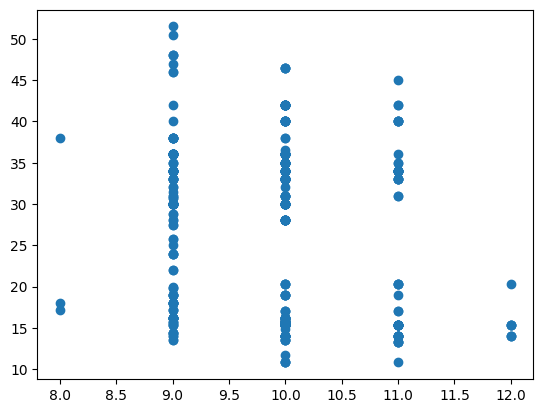

In [30]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)  

### It doesn't clearly show the correlations Here..,, so ... we are going to use another method

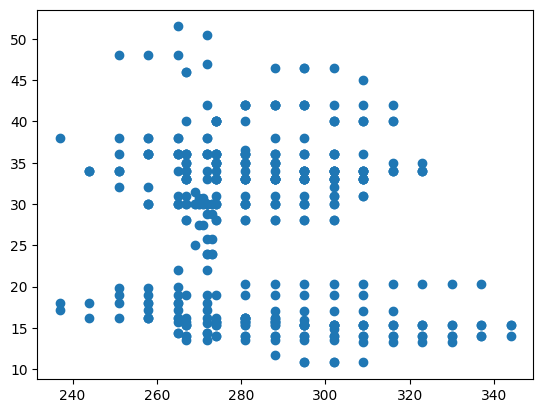

In [31]:
plt.scatter('DayOfYear','Price',data=new_pumpkins)

### Its show the correlation but its Little bit confused one ...so..we gonna use another method

In [32]:
#print the correlations between month and price
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
#print the correlations between Day of the year and price 
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14912913634278593
-0.1669009250593447


### We can also color the pumpkins of different types

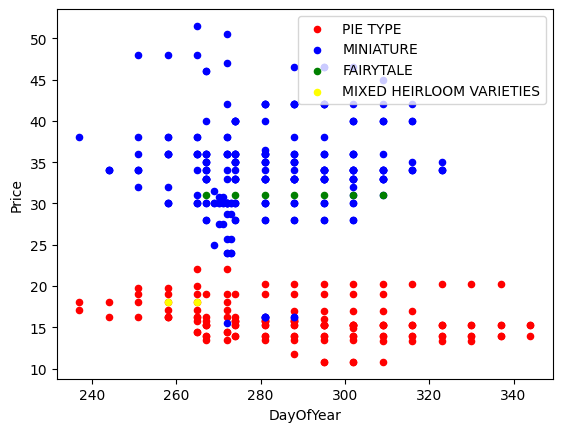

In [33]:
#Define the colors to use to plot the pumpkins
colors = ['red','blue','green','yellow']

#Plot the price vs day of the year for the pumpkins,
# using a different color for each variety
ax = None
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c = colors[i],label = var)


<Axes: xlabel='Variety'>

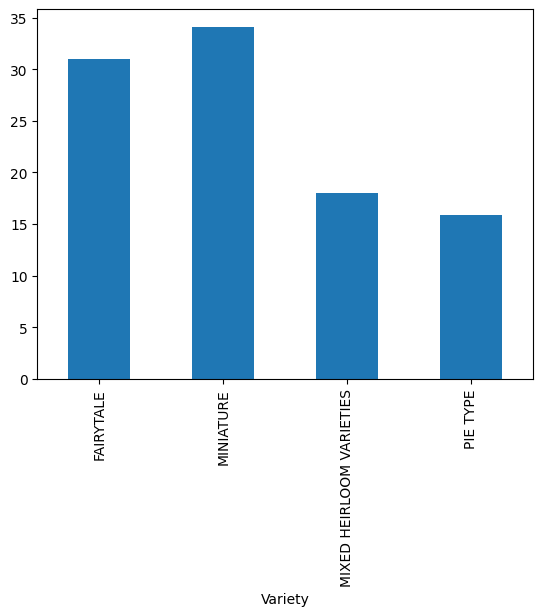

In [34]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

<Axes: xlabel='DayOfYear', ylabel='Price'>

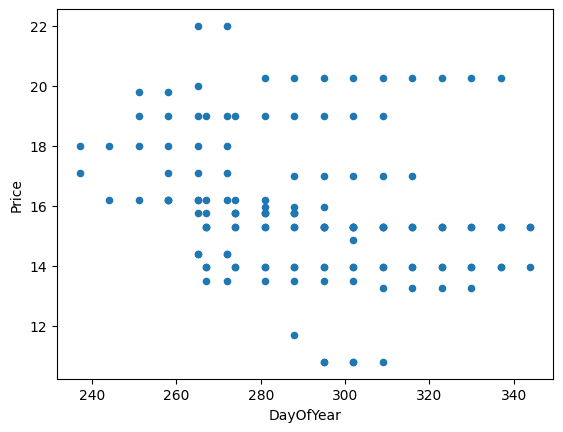

In [35]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price')

In [36]:
#print the correlation between month and price
print(pie_pumpkins['Month'].corr(pie_pumpkins['Price']))
#print the correlation between day of the year and price
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

-0.23898568315758908
-0.266785596914419
